### Running stats on chronic freezing data. PTSD, ELS mice
4/25/2022, GT

In [1]:
!pip install pingouin

     |████████████████████████████████| 183 kB 17.4 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
     |████████████████████████████████| 9.8 MB 54.8 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=5cac3a1a861479e42abb2636ae5e90cb438d49746a79a055bd59295359ede07b
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=d7b38f7f062e571baa99d26f4fcf7d0ba05ca9d131fb5f94b7641a294014e82c
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling stats

In [1]:
from os.path import join
import sys
import glob

import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.factorplots import interaction_plot
import seaborn as sns
# sns.set(font_scale = 1.5)
sns.set_context('talk')
import pandas as pd
import datetime
import pingouin as pg
%matplotlib inline

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

from google.colab import drive
drive.mount('/content/drive')

save_dir = '/content/drive/Shareddrives/TuriLab/Data/PTSD_project/!analysis/saveFolder/'

Mounted at /content/drive


Loading data

In [3]:
df = pd.read_csv(join(save_dir, "all_cohorts_data_w_ELS_4_25_22.csv"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1165 non-null   int64  
 1   freezing           1160 non-null   float64
 2   genotype           1165 non-null   object 
 3   id                 1165 non-null   object 
 4   day                1165 non-null   object 
 5   condition          1165 non-null   object 
 6   sex                1165 non-null   object 
 7   cohort             1165 non-null   object 
 8   exposure_mins      824 non-null    float64
 9   analyzed_duration  824 non-null    float64
 10  date               1096 non-null   object 
 11  time               760 non-null    object 
 12  els                1165 non-null   object 
 13  cohort_id          1165 non-null   object 
 14  date_time          1096 non-null   object 
 15  man_date_time      1096 non-null   object 
 16  dob                1165 

In [4]:
age_matched_controls = ['ptsd3_2', 'ptsd3_12',
       'ptsd3_1', 'ptsd3_3', 'ptsd3_11', 'ptsd5_11', 'ptsd5_61',
       'ptsd5_12', 'ptsd5_13', 'ptsd5_64', 'ptsd5_62']

els_mice = df[df['cohort_id'].str.startswith('els1')]
els_mice.head()
print(f'els mice: {els_mice.cohort_id.nunique()}')

age_matched_mice = df[df['cohort_id'].isin(age_matched_controls)]
print(f'age matched mice: {age_matched_mice.cohort_id.nunique()}')

els_age_matched = pd.concat([els_mice, age_matched_mice], axis=0)
print(f'els and age matched: {els_age_matched.cohort_id.nunique()}')

els_age_matched.rename({'freezing':'Freezing', 'day':'Day'}, inplace=True, axis=1)
els_age_matched.head(2)

els mice: 42
age matched mice: 11
els and age matched: 53


,Unnamed: 0,Freezing,genotype,id,Day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,els,cohort_id,date_time,man_date_time,dob
829,829,34.20,wt,927-1,sefla,control,male,els1,NaN,NaN,2022-02-17,NaN,n,els1_927-1,2/17/22,2022-02-17 00:00:00,2021-10-21
830,830,16.54,wt,927-1,seflb,control,male,els1,NaN,NaN,2022-02-18,NaN,n,els1_927-1,2/18/22,2022-02-18 00:00:00,2021-10-21


Plotting all mice with all recalls

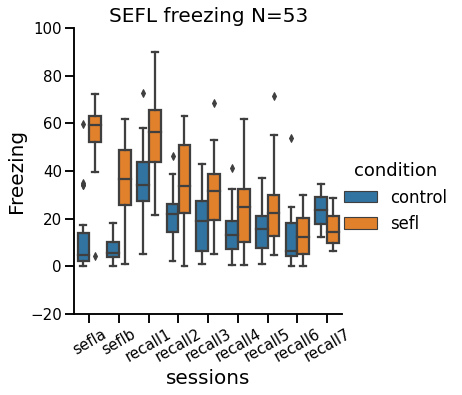

<Figure size 1800x1200 with 0 Axes>

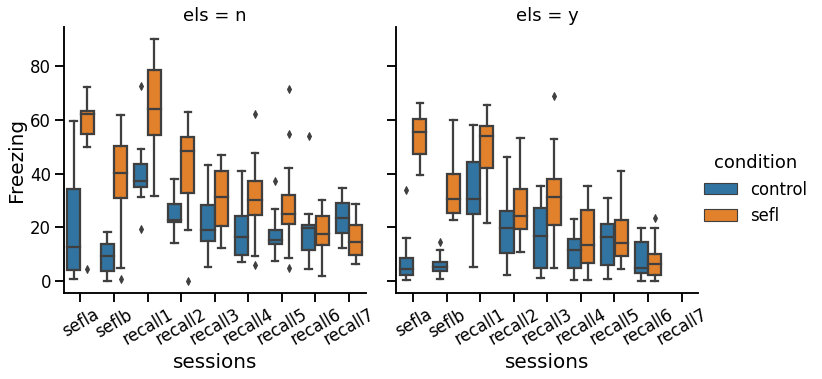

In [5]:
df = els_age_matched
g = sns.catplot(data = df, kind='box', 
                x="Day", y="Freezing", hue="condition", legend=True,
                hue_order=['control', 'sefl'])

plt.title(f'SEFL freezing N={df.cohort_id.nunique()}',
          fontsize=20)
# plt.legend(loc='upper right')
g.set_xticklabels(rotation=30, fontsize=15)
g.set_xlabels('sessions', fontsize=20)
g.set_ylabels(fontsize=20)
g.set_yticklabels(fontsize=15)
plt.figure(dpi=300)

# plot2
g2 = sns.catplot(data= df, kind='box',
                x='Day', y='Freezing', hue='condition',
                 col='els', legend=True, hue_order=['control', 'sefl'])
g2.set_xticklabels(rotation = 30)
g2.set_ylabels(fontsize=20)
# g2.fig.suptitle("Males, Females", y=1.03, fontsize=20)
g2.set_xlabels('sessions', fontsize=20)

### Plotting Sefla and b days

els
n    23
y    30
Name: cohort_id, dtype: int64


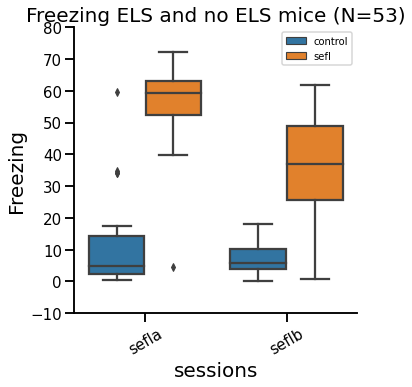

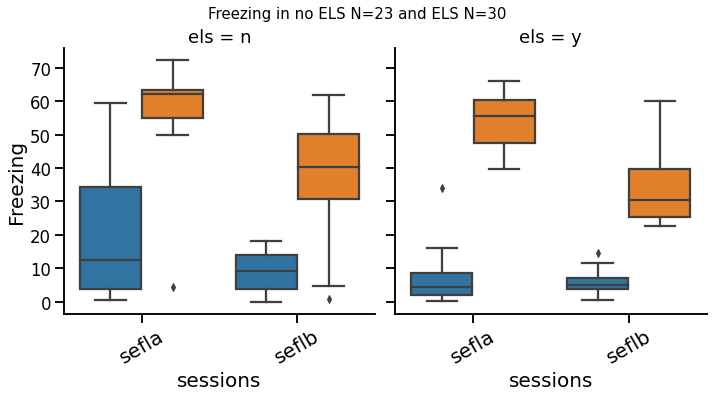

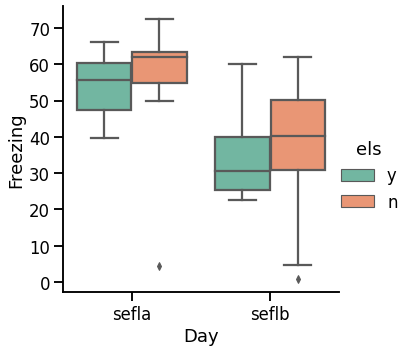

In [6]:
day_list = ['sefla', 'seflb']

df_filt = df[df['Day'].isin(day_list)]

g = sns.catplot(data = df_filt, kind='box',
               x='Day', y='Freezing', hue='condition', legend=False,
               )
plt.title(f'Freezing ELS and no ELS mice (N={df_filt.cohort_id.nunique()})',
          fontsize=20)
plt.legend(loc='upper right', fontsize=10)
g.set_xticklabels(rotation=30, fontsize=15)
g.set_xlabels('sessions', fontsize=20)
g.set_ylabels(fontsize=20)
g.set_yticklabels(fontsize=15)
# plt.savefig(join(save_dir, 'SEFL_freezing_ELS_noELS.png'), dpi=300,
#             transparent=True, bbox_inches='tight',
#             figsize=(5,8))

# df_filt plot2
num_els = df_filt.groupby(['els'])['cohort_id'].nunique()
print(num_els)
g2 = sns.catplot(data= df_filt, kind='box',
                x='Day', y='Freezing', hue='condition',
                 col='els', legend=False)
# g2 = sns.catplot(data= df_filt, kind='swarm',
#                 x='Day', y='Freezing', hue='condition',
#                  col='els', legend=False, dodge=True)
# plt.legend(loc='upper right')
g2.set_xticklabels(rotation = 30, fontsize=20)
g2.set_xlabels('sessions', fontsize=20)
g2.set_ylabels(fontsize=20)
g.set_yticklabels(fontsize=15)

title = f'Freezing in no ELS N={num_els[0]} and ELS N={num_els[1]}'
g2.fig.suptitle(title, y=1.03, fontsize=15)
# plt.savefig(join(save_dir, 'SEFLa_andb_freezing_ELS_noELS_separated.png'), dpi=300,
#             transparent=True, bbox_inches='tight',
#             figsize=(5,8))

# ELS SEFL vs non-ELS SEFL mice
df_SEFL = df_filt[(df_filt['condition']== 'sefl')]
g = sns.catplot(data=df_SEFL, kind='box', x='Day', y='Freezing',
                hue='els', hue_order=['y', 'n'], palette='Set2')
# plt.savefig(join(save_dir, 'ELS','SEFLa_andb_freezing_ELS_noELS_separated_box.png'), dpi=300,
#             transparent=True, bbox_inches='tight',
#             figsize=(5,8))

[Text(0, 0, 'sefla'), Text(0, 0, 'seflb')]

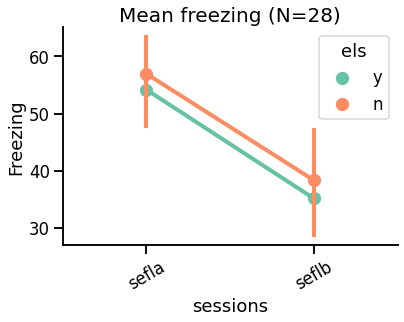

In [7]:
g = sns.pointplot(data=df_SEFL, x='Day', y='Freezing', hue='els',
                  hue_order=['y', 'n'], palette='Set2')
plt.title(f'Mean freezing (N={df_SEFL.cohort_id.nunique()})',
          fontsize=20)
sns.despine()
# plt.legend(loc='upper right', fontsize=10)
g.set_xlabel('sessions')
g.set_xticklabels(g.get_xticklabels(),rotation = 30)
# plt.savefig(join(save_dir,'ELS', 'Mean_freezing_SEFL_ELS_noELS.png'), dpi=300,
#             transparent=True, bbox_inches='tight',
#             figsize=(5,8))

comparing SEFL sessions

In [8]:
no_els = df_filt[df_filt['els']== 'n']
print('all mice in the no-ELS group:')
print(no_els.groupby('condition')['cohort_id'].nunique())
print('===================\n')

# picking random mice to equalize the sample sizes for SEFL and control non-ELS mice 
  #everytime we run this cell it will pick out another random group -- gives different p-valus everytime
no_els_sefl_id = no_els[no_els['condition']=='sefl']['cohort_id'].unique()
rand_mice = np.random.choice(no_els_sefl_id, size=9, replace=False)
print(f'random mice: {rand_mice}\n')

df_equal_noels = pd.concat([no_els[no_els['condition']=='control'],
                      no_els[no_els['cohort_id'].isin(rand_mice)]])

print('all mice in the no-ELS group:')
# print(df_equal_noels.groupby('condition')['cohort_id'].unique()[0])
# print(df_equal_noels.groupby('condition')['cohort_id'].unique()[1])
print(df_equal_noels.groupby('condition')['cohort_id'].nunique())
print('===================\n')

all mice in the no-ELS group:
condition
control     9
sefl       14
Name: cohort_id, dtype: int64

random mice: ['els1_939-2' 'els1_936-2' 'ptsd5_62' 'ptsd5_13' 'ptsd5_12' 'ptsd5_64'
 'ptsd3_1' 'ptsd3_11' 'els1_936-1']

all mice in the no-ELS group:
condition
control    9
sefl       9
Name: cohort_id, dtype: int64



In [9]:
#########
# mixed #
#########
res = pg.mixed_anova(dv='Freezing', between='condition', within='Day',
                     subject='cohort_id',data=df_equal_noels)
res.round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,condition,11663.640,1,16,11663.640,47.013,0.000,0.746,NaN
1,Day,2013.766,1,16,2013.766,15.282,0.001,0.489,1.0
2,Interaction,225.851,1,16,225.851,1.714,0.209,0.097,NaN


Plotting all mice with `recall1` to `recall6`

els
n    23
y    30
Name: cohort_id, dtype: int64


Text(0.5, 1.03, 'Freezing in no ELS N=23 and ELS N=30')

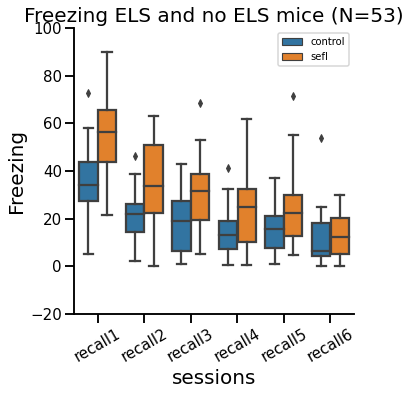

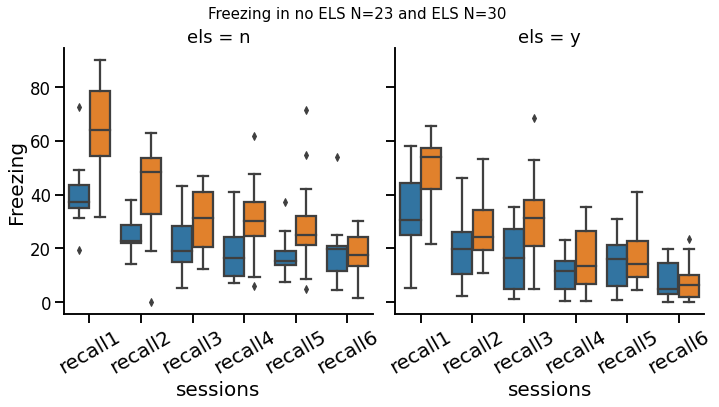

In [10]:
#just restricting to recalls01-06

day_list = ['recall1', 'recall2', 'recall3',
            'recall4', 'recall5', 'recall6']

df_filt = df[df['Day'].isin(day_list)]

g = sns.catplot(data = df_filt, kind='box',
               x='Day', y='Freezing', hue='condition', legend=False,
               )
plt.title(f'Freezing ELS and no ELS mice (N={df_filt.cohort_id.nunique()})',
          fontsize=20)
plt.legend(loc='upper right', fontsize=10)
g.set_xticklabels(rotation=30, fontsize=15)
g.set_xlabels('sessions', fontsize=20)
g.set_ylabels(fontsize=20)
g.set_yticklabels(fontsize=15)
# plt.savefig(join(save_dir, 'SEFL_freezing_ELS_noELS.png'), dpi=300,
#             transparent=True, bbox_inches='tight',
#             figsize=(5,8))

# df_filt plot2
num_els = df_filt.groupby(['els'])['cohort_id'].nunique()
print(num_els)
g2 = sns.catplot(data= df_filt, kind='box',
                x='Day', y='Freezing', hue='condition',
                 col='els', legend=False)

# plt.legend(loc='upper right')
g2.set_xticklabels(rotation = 30, fontsize=20)
g2.set_xlabels('sessions', fontsize=20)
g2.set_ylabels(fontsize=20)
g.set_yticklabels(fontsize=15)

title = f'Freezing in no ELS N={num_els[0]} and ELS N={num_els[1]}'
g2.fig.suptitle(title, y=1.03, fontsize=15)
# plt.savefig(join(save_dir, 'SEFL_freezing_ELS_noELS_separated.png'), dpi=300,
#             transparent=True, bbox_inches='tight',
#             figsize=(5,8))

In [11]:
df_filt.head()

,Unnamed: 0,Freezing,genotype,id,Day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,els,cohort_id,date_time,man_date_time,dob
831,831,49.24,wt,927-1,recall1,control,male,els1,NaN,NaN,2022-02-19,NaN,n,els1_927-1,2/19/22,2022-02-19 00:00:00,2021-10-21
832,832,38.00,wt,927-1,recall2,control,male,els1,NaN,NaN,2022-02-24,NaN,n,els1_927-1,2/24/22,2022-02-24 00:00:00,2021-10-21
833,833,43.07,wt,927-1,recall3,control,male,els1,NaN,NaN,2022-03-04,NaN,n,els1_927-1,3/4/22,2022-03-04 00:00:00,2021-10-21
834,834,24.07,wt,927-1,recall4,control,male,els1,NaN,NaN,2022-03-10,NaN,n,els1_927-1,3/10/22,2022-03-10 00:00:00,2021-10-21
835,835,12.86,wt,927-1,recall5,control,male,els1,NaN,NaN,2022-03-18,NaN,n,els1_927-1,3/18/22,2022-03-18 00:00:00,2021-10-21


In [12]:
#########
# mixed ANOVA #
#########
res = pg.mixed_anova(dv='Freezing', between='condition', within='Day',
                     subject='cohort_id',data=df_filt)
res.round(5)
#interaction is the effect of both the condition and the day on freezing
#condition is just effect of SEFL vs. control on freezing
#day is effect of recall session on freezing
#if my test and this test both show significance, specific p value is not as important as knowing that there is significance or not

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,condition,9151.41120,1,51,9151.41120,15.98264,0.00021,NaN,0.23861,NaN,NaN,NaN,NaN
1,Day,37028.95447,5,255,7405.79089,72.33961,0.00000,0.0,0.58651,0.76725,False,0.48733,0.00105
2,Interaction,2652.33354,5,255,530.46671,5.18159,0.00015,NaN,0.09223,NaN,NaN,NaN,NaN


### Mixed ANOVA with NON ELS mice

In [13]:
no_els = df_filt[df_filt['els']== 'n']
print('all mice in the no-ELS group:')
print(no_els.groupby('condition')['cohort_id'].nunique())
print('===================\n')

# picking random mice to equalize the sample sizes for SEFL and control non-ELS mice 
  #everytime we run this cell it will pick out another random group -- gives different p-valus everytime
no_els_sefl_id = no_els[no_els['condition']=='sefl']['cohort_id'].unique()
rand_mice = np.random.choice(no_els_sefl_id, size=9, replace=False)
print(f'random mice: {rand_mice}\n')

df_equal_noels = pd.concat([no_els[no_els['condition']=='control'],
                      no_els[no_els['cohort_id'].isin(rand_mice)]])

print('all mice in the no-ELS group:')
# print(df_equal_noels.groupby('condition')['cohort_id'].unique()[0])
# print(df_equal_noels.groupby('condition')['cohort_id'].unique()[1])
print(df_equal_noels.groupby('condition')['cohort_id'].nunique())
print('===================\n')

all mice in the no-ELS group:
condition
control     9
sefl       14
Name: cohort_id, dtype: int64

random mice: ['ptsd3_3' 'ptsd5_12' 'ptsd3_12' 'ptsd5_64' 'els1_941-1' 'els1_936-1'
 'ptsd3_1' 'els1_939-2' 'ptsd3_11']

all mice in the no-ELS group:
condition
control    9
sefl       9
Name: cohort_id, dtype: int64



<Figure size 1800x1200 with 0 Axes>

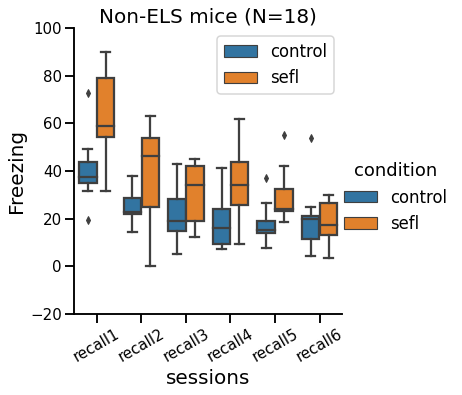

<Figure size 1800x1200 with 0 Axes>

In [14]:
g = sns.catplot(data = df_equal_noels, kind='box',
               x="Day", y="Freezing", hue="condition", legend=True,
               )
plt.title(f'Non-ELS mice (N={df_equal_noels.cohort_id.nunique()})',
          fontsize=20)
plt.legend(loc='upper right')
g.set_xticklabels(rotation=30, fontsize=15)
g.set_xlabels('sessions', fontsize=20)
g.set_ylabels(fontsize=20)
g.set_yticklabels(fontsize=15)
plt.figure(dpi=300)

In [15]:
#########
# mixed #
#########
res = pg.mixed_anova(dv='Freezing', between='condition', within='Day',
                     subject='cohort_id',data=df_equal_noels)
res.round(5)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,condition,4056.95671,1,16,4056.95671,8.17616,0.01136,0.33819,NaN
1,Day,11468.47022,5,80,2293.69404,17.29166,0.00000,0.51940,0.64836
2,Interaction,1330.96202,5,80,266.19240,2.00677,0.08652,0.11145,NaN


[Text(0, 0, 'recall1'),
 Text(0, 0, 'recall2'),
 Text(0, 0, 'recall3'),
 Text(0, 0, 'recall4'),
 Text(0, 0, 'recall5'),
 Text(0, 0, 'recall6')]

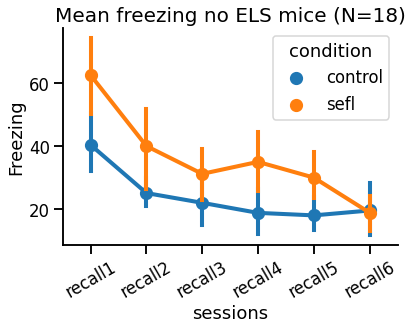

In [16]:
g = sns.pointplot(data=df_equal_noels, x='Day', y='Freezing', hue='condition')
plt.title(f'Mean freezing no ELS mice (N={df_equal_noels.cohort_id.nunique()})',
          fontsize=20)
sns.despine()
# plt.legend(loc='upper right', fontsize=10)
g.set_xlabel('sessions')
g.set_xticklabels(g.get_xticklabels(),rotation = 30)
# plt.savefig(join(save_dir, 'Mean_freezing_noELS.png'), dpi=300,
#             transparent=True, bbox_inches='tight',
#             figsize=(5,8))

T-tests between everything

In [17]:
pg.pairwise_ttests(data=df_equal_noels, dv='Freezing', between='condition',
                   within='Day', subject='cohort_id').round(3)

,Contrast,Day,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Day,-,recall1,recall2,True,True,4.851,17.0,two-sided,0.000,196.942,0.970
1,Day,-,recall1,recall3,True,True,5.574,17.0,two-sided,0.000,745.416,1.407
2,Day,-,recall1,recall4,True,True,5.612,17.0,two-sided,0.000,797.79,1.309
3,Day,-,recall1,recall5,True,True,5.677,17.0,two-sided,0.000,897.565,1.591
4,Day,-,recall1,recall6,True,True,5.738,17.0,two-sided,0.000,1002.268,1.871
5,Day,-,recall2,recall3,True,True,2.279,17.0,two-sided,0.036,1.874,0.383
6,Day,-,recall2,recall4,True,True,1.420,17.0,two-sided,0.174,0.573,0.336
7,Day,-,recall2,recall5,True,True,1.992,17.0,two-sided,0.063,1.211,0.566
8,Day,-,recall2,recall6,True,True,3.041,17.0,two-sided,0.007,6.812,0.884
9,Day,-,recall3,recall4,True,True,-0.094,17.0,two-sided,0.926,0.244,-0.021


Mixed ANOVA on SEFL Mice (ELS vs. No ELS)

### Mixed Anova on ELS mice



In [18]:
els = df_filt[df_filt['els']== 'y']
print('all mice in the no-ELS group:')
print(els.groupby('condition')['cohort_id'].nunique())
print('===================\n')

# picking random mice
els_control_id = els[els['condition']=='control']['cohort_id'].unique()
rand_mice = np.random.choice(els_control_id, size=14, replace=False)
print(f'random mice: {rand_mice}\n')

df_equal = pd.concat([els[els['condition']=='sefl'],
                      els[els['cohort_id'].isin(rand_mice)]])

print('all mice in the no-ELS group:')
# print(df_equal.groupby('condition')['cohort_id'].unique()[0])
# print(df_equal.groupby('condition')['cohort_id'].unique()[1])
print(df_equal.groupby('condition')['cohort_id'].nunique())
print('===================\n')

all mice in the no-ELS group:
condition
control    16
sefl       14
Name: cohort_id, dtype: int64

random mice: ['els1_942-1' 'els1_922-4' 'els1_922-3' 'els1_930-2' 'els1_868-3'
 'els1_922-1' 'els1_922-2' 'els1_942-3' 'els1_930-3' 'els1_922-5'
 'els1_942-4' 'els1_868-1' 'els1_930-4' 'els1_930-1']

all mice in the no-ELS group:
condition
control    14
sefl       14
Name: cohort_id, dtype: int64



<Figure size 1800x1200 with 0 Axes>

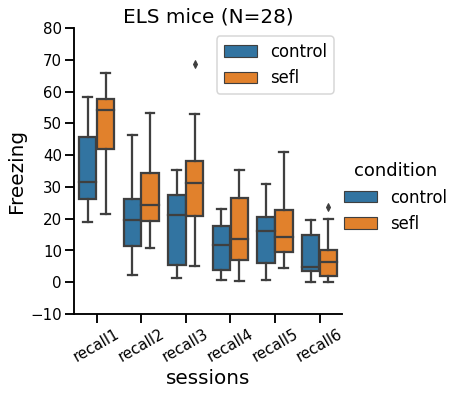

<Figure size 1800x1200 with 0 Axes>

In [19]:
g = sns.catplot(data = df_equal, kind='box',
               x="Day", y="Freezing", hue="condition", legend=True,
               hue_order=['control', 'sefl'])
plt.title(f'ELS mice (N={df_equal.cohort_id.nunique()})',
          fontsize=20)
plt.legend(loc='upper right')
g.set_xticklabels(rotation=30, fontsize=15)
g.set_xlabels('sessions', fontsize=20)
g.set_ylabels(fontsize=20)
g.set_yticklabels(fontsize=15)
plt.figure(dpi=300)

In [20]:
#########
# mixed #
#########
res = pg.mixed_anova(dv='Freezing', between='condition', within='Day',
                     subject='cohort_id',data=df_equal)
res.round(4)

,Source,SS,DF1,DF2,MS,F,p-unc,p-GG-corr,np2,eps,sphericity,W-spher,p-spher
0,condition,2143.7858,1,26,2143.7858,4.5367,0.0428,NaN,0.1486,NaN,NaN,NaN,NaN
1,Day,20149.2684,5,130,4029.8537,60.2385,0.0000,0.0,0.6985,0.7719,False,0.3425,0.0204
2,Interaction,1023.6807,5,130,204.7361,3.0604,0.0121,NaN,0.1053,NaN,NaN,NaN,NaN


[Text(0, 0, 'recall1'),
 Text(0, 0, 'recall2'),
 Text(0, 0, 'recall3'),
 Text(0, 0, 'recall4'),
 Text(0, 0, 'recall5'),
 Text(0, 0, 'recall6')]

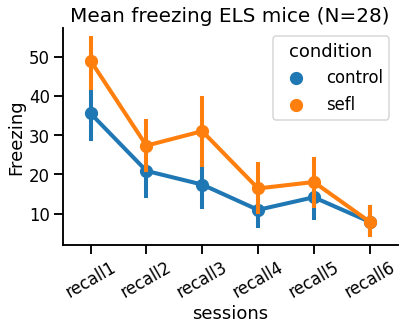

In [21]:
#non-els sefl vs control
g = sns.pointplot(data=df_equal, x='Day', y='Freezing', hue='condition',
                  hue_order=['control', 'sefl'])
plt.title(f'Mean freezing ELS mice (N={df_equal.cohort_id.nunique()})',
          fontsize=20)
sns.despine()
# plt.legend(loc='upper right', fontsize=10)
g.set_xlabel('sessions')
g.set_xticklabels(g.get_xticklabels(),rotation = 30)
# plt.savefig(join(save_dir, 'Mean_freezing_ELS.png'), dpi=300,
#             transparent=True, bbox_inches='tight',
#             figsize=(5,8))

T-tests

In [22]:
pg.pairwise_ttests(data=df_equal, dv='Freezing', between='condition',
                   within='Day', subject='cohort_id').round(3)

,Contrast,Day,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Day,-,recall1,recall2,True,True,6.515,27.0,two-sided,0.000,3.078e+04,1.331
1,Day,-,recall1,recall3,True,True,6.804,27.0,two-sided,0.000,6.144e+04,1.170
2,Day,-,recall1,recall4,True,True,13.613,27.0,two-sided,0.000,5.412e+10,2.248
3,Day,-,recall1,recall5,True,True,10.426,27.0,two-sided,0.000,1.673e+08,2.054
4,Day,-,recall1,recall6,True,True,13.436,27.0,two-sided,0.000,4.031e+10,3.019
5,Day,-,recall2,recall3,True,True,-0.038,27.0,two-sided,0.970,0.201,-0.007
6,Day,-,recall2,recall4,True,True,5.008,27.0,two-sided,0.000,787.474,0.885
7,Day,-,recall2,recall5,True,True,3.174,27.0,two-sided,0.004,10.678,0.678
8,Day,-,recall2,recall6,True,True,7.978,27.0,two-sided,0.000,9.342e+05,1.567
9,Day,-,recall3,recall4,True,True,5.328,27.0,two-sided,0.000,1721.841,0.761


### Comparing ELS + SEFL and no-ELS+ SEFL mice

In [23]:
els_sefl_df = df_filt[(df_filt['els']=='y') &
                      (df_filt['condition']=='sefl')]
no_els_sefl_df = df_filt[(df_filt['els']=='n') &
                      (df_filt['condition']=='sefl')]

sefl_els_df = pd.concat([els_sefl_df, no_els_sefl_df])
sefl_els_df.groupby('els')['cohort_id'].nunique()
# sefl_els_df.head(2)

els
n    14
y    14
Name: cohort_id, dtype: int64

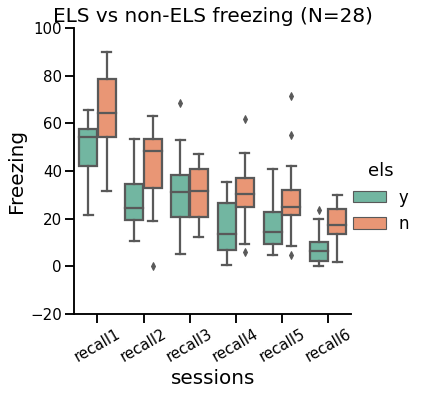

In [24]:
g = sns.catplot(data = sefl_els_df, kind='box',
               x="Day", y="Freezing", hue="els", legend=True,
               palette='Set2')
plt.title(f'ELS vs non-ELS freezing (N={sefl_els_df.cohort_id.nunique()})',
          fontsize=20)
# plt.legend(loc='upper right')
g.set_xticklabels(rotation=30, fontsize=15)
g.set_xlabels('sessions', fontsize=20)
g.set_ylabels(fontsize=20)
g.set_yticklabels(fontsize=15)
# plt.savefig(join(save_dir, 'ELS', 'Freezing_ELS_vs_noELS_box.png'), dpi=300,
#             transparent=True, bbox_inches='tight',
#             figsize=(5,8))

In [25]:
#########
# mixed #
#########
res = pg.mixed_anova(dv='Freezing', between='els', within='Day',
                     subject='cohort_id',data=sefl_els_df)
res.round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,els,4849.433,1,26,4849.433,9.054,0.006,0.258,NaN
1,Day,30204.928,5,130,6040.986,47.864,0.000,0.648,0.726
2,Interaction,1203.941,5,130,240.788,1.908,0.097,0.068,NaN


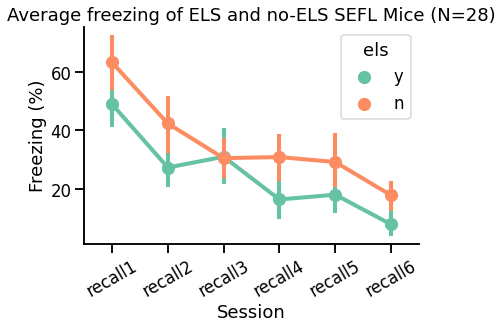

In [26]:
#aside from recall03, no els is higher than els for sefl mice 
  #shows trends that els makes these mice freeze less -- explanation isn't final yet (ex. resilience or learning deficit)
g=sns.pointplot(data=sefl_els_df, x='Day', y='Freezing', hue='els', 
                palette='Set2')
sns.despine()
plt.title(f'Average freezing of ELS and no-ELS SEFL Mice (N={sefl_els_df.cohort_id.nunique()})',
          fontsize=18)
g.set_xlabel("Session")
g.set_ylabel("Freezing (%)")
g.set_xticklabels(g.get_xticklabels(),rotation = 30)

plt.savefig(join(save_dir, 'ELS', 'Mean_freezing_ELS_vs_noELS.png'), dpi=300,
            transparent=True, bbox_inches='tight',
            figsize=(5,8))

In [27]:
sefl_els_df.head()

,Unnamed: 0,Freezing,genotype,id,Day,condition,sex,cohort,exposure_mins,analyzed_duration,date,time,els,cohort_id,date_time,man_date_time,dob
927,927,61.31,wt,941-3,recall1,sefl,male,els1,NaN,NaN,2022-02-19,NaN,y,els1_941-3,2/19/22,2022-02-19 00:00:00,2021-10-25
928,928,31.76,wt,941-3,recall2,sefl,male,els1,NaN,NaN,2022-02-24,NaN,y,els1_941-3,2/24/22,2022-02-24 00:00:00,2021-10-25
929,929,28.95,wt,941-3,recall3,sefl,male,els1,NaN,NaN,2022-03-04,NaN,y,els1_941-3,3/4/22,2022-03-04 00:00:00,2021-10-25
930,930,22.28,wt,941-3,recall4,sefl,male,els1,NaN,NaN,2022-03-10,NaN,y,els1_941-3,3/10/22,2022-03-10 00:00:00,2021-10-25
931,931,13.28,wt,941-3,recall5,sefl,male,els1,NaN,NaN,2022-03-18,NaN,y,els1_941-3,3/18/22,2022-03-18 00:00:00,2021-10-25


In [33]:
to_export = sefl_els_df[['Freezing', 'Day', 'cohort_id', 'els']]
# to_export.to_csv(join(save_dir, 'ELS', 'SEFL_ELS_vs_SEFL_noELS.csv'))
# to_export.groupby('els')['cohort_id'].nunique()
to_export.head()

,Freezing,Day,cohort_id,els
927,61.31,recall1,els1_941-3,y
928,31.76,recall2,els1_941-3,y
929,28.95,recall3,els1_941-3,y
930,22.28,recall4,els1_941-3,y
931,13.28,recall5,els1_941-3,y


In [ ]:
pg.pairwise_ttests(data=sefl_els_df, dv='Freezing', between='els',
                   within='Day', subject='cohort_id').round(3)

,Contrast,Day,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges
0,Day,-,recall1,recall2,True,True,7.323,27.0,two-sided,0.000,2.078e+05,1.223
1,Day,-,recall1,recall3,True,True,7.219,27.0,two-sided,0.000,1.631e+05,1.570
2,Day,-,recall1,recall4,True,True,11.950,27.0,two-sided,0.000,3.02e+09,1.971
3,Day,-,recall1,recall5,True,True,8.040,27.0,two-sided,0.000,1.075e+06,1.949
4,Day,-,recall1,recall6,True,True,14.874,27.0,two-sided,0.000,4.084e+11,3.067
5,Day,-,recall2,recall3,True,True,1.327,27.0,two-sided,0.195,0.442,0.256
6,Day,-,recall2,recall4,True,True,3.536,27.0,two-sided,0.001,23.796,0.689
7,Day,-,recall2,recall5,True,True,2.911,27.0,two-sided,0.007,6.13,0.682
8,Day,-,recall2,recall6,True,True,8.715,27.0,two-sided,0.000,4.783e+06,1.584
9,Day,-,recall3,recall4,True,True,2.380,27.0,two-sided,0.025,2.175,0.476
